In [165]:
import pandas as pd
from pandas import DataFrame

try:
# Carica il tuo file XLSX
    xlsx_file = 'dataset/richerDataset.xlsx'  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
# except Exception as e:
    print(f"Si è verificato un errore: {e}")                                                          
    
# Rimuovi il record con k_m2 uguale a 0
df = df[df['k_m2'] != 0]
#Rimuovi colonne Porosity tot e SSA tot
df = df.drop(['Porosity_Tot', 'SSA_Tot'], axis=1)
# Resetta gli indici del DataFrame
df.reset_index(drop=True, inplace=True)



k2_max = df['k_m2'].max()
k2_min = df['k_m2'].min()
print(df)



    Conn.Dens.  Porosity     SSA      Ech  Tortuosity          k_m2
0      310.913     0.137   5.065  -25.849      2.0340  1.473350e-12
1      310.913     0.147   5.253  -31.002      2.6650  2.254724e-12
2      310.913     0.131   4.697  -20.047      2.1090  9.543177e-12
3      350.137     0.115   5.583  -50.613      4.1830  9.664920e-13
4      350.137     0.139   7.447 -136.737      2.5950  9.180783e-13
5      350.137     0.115   5.311  -32.907      4.1010  1.435774e-12
6      368.141     0.134   6.990 -115.218      2.7740  4.010302e-13
7      368.141     0.138   7.132 -110.411      2.7790  3.937021e-12
8      368.141     0.116   5.290  -39.748      3.8680  1.933907e-12
9       10.573     0.020   0.791   -3.948      3.1000  3.021802e-13
10      10.573     0.020   0.806   -2.017      2.9000  3.190436e-13
11     458.436     0.273   7.721 -102.424      1.7170  5.516051e-11
12     458.436     0.250   6.870  -76.478      1.3530  3.822390e-11
13     458.436     0.265   7.560  -95.050      1

In [166]:
# Log-Trasformo la colonna k_m2 in base 10
import numpy as np
df['k_m2'] = np.log10(df['k_m2'])
print(df)

    Conn.Dens.  Porosity     SSA      Ech  Tortuosity       k_m2
0      310.913     0.137   5.065  -25.849      2.0340 -11.831694
1      310.913     0.147   5.253  -31.002      2.6650 -11.646907
2      310.913     0.131   4.697  -20.047      2.1090 -11.020307
3      350.137     0.115   5.583  -50.613      4.1830 -12.014802
4      350.137     0.139   7.447 -136.737      2.5950 -12.037120
5      350.137     0.115   5.311  -32.907      4.1010 -11.842914
6      368.141     0.134   6.990 -115.218      2.7740 -12.396823
7      368.141     0.138   7.132 -110.411      2.7790 -11.404832
8      368.141     0.116   5.290  -39.748      3.8680 -11.713564
9       10.573     0.020   0.791   -3.948      3.1000 -12.519734
10      10.573     0.020   0.806   -2.017      2.9000 -12.496150
11     458.436     0.273   7.721 -102.424      1.7170 -10.258372
12     458.436     0.250   6.870  -76.478      1.3530 -10.417665
13     458.436     0.265   7.560  -95.050      1.5730 -10.277698
14     607.796     0.250 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la matrice di correlazione
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualizza la matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice di Correlazione')
plt.show()

In [ ]:
import numpy as np
# Crea grafici di dispersione per tutte le coppie di variabili
#Voglio inserire nei plot in diagonale un numero di bins = 50
sns.pairplot(df, diag_kind='hist', diag_kws={'bins': 20})
plt.show()


In [167]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)
# Crea un nuovo DataFrame con i dati scalati e riassegna le colonne non scalate
#df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)



# Stampa il DataFrame scalato
print("DataFrame scalato:")
print(df_scaled)

DataFrame scalato:
    Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
0     0.502894  0.422383  0.449469  0.933953    0.222507  0.476669
1     0.502894  0.458484  0.469240  0.919672    0.424816  0.526208
2     0.502894  0.400722  0.410769  0.950032    0.246553  0.694191
3     0.568572  0.342960  0.503944  0.865322    0.911510  0.427581
4     0.568572  0.429603  0.699968  0.626641    0.402373  0.421597
5     0.568572  0.342960  0.475339  0.914392    0.885220  0.473661
6     0.598718  0.411552  0.651909  0.686278    0.459763  0.325166
7     0.598718  0.425993  0.666842  0.699600    0.461366  0.591105
8     0.598718  0.346570  0.473131  0.895433    0.810516  0.508338
9     0.000000  0.000000  0.000000  0.994648    0.564283  0.292215
10    0.000000  0.000000  0.001577  1.000000    0.500160  0.298538
11    0.749909  0.913357  0.728783  0.721735    0.120872  0.898455
12    0.749909  0.830325  0.639289  0.793641    0.004168  0.855751
13    0.749909  0.884477  0.711852  0.74217

In [ ]:

plt.figure(figsize=(6, 6))
plt.scatter(best_y_test, final_y_pred)
plt.plot([best_y_test.min(), best_y_test.max()], [best_y_test.min(), best_y_test.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error




# Assuming df_scaled is already defined
features_X = df_scaled.drop(['k_m2'], axis=1)
targets_X = df_scaled[['k_m2']]

best_r2 = -np.inf
best_random_state = None
best_X_train, best_X_test, best_y_train, best_y_test = None, None, None, None

final_y_pred = None


for random_state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(features_X, targets_X, test_size=0.2, random_state=random_state)
    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    if r2 > best_r2:
        best_r2 = r2
        best_random_state = random_state
        best_X_train, best_X_test, best_y_train, best_y_test = X_train, X_test, y_train, y_test
        final_y_pred = y_pred

print(f'Il miglior random state è: {best_random_state} con un R² di: {best_r2}')

Viene testato ogni possibile estimatore per trovare il migliore in base al miglior 
random state.

Random State 1: R^2 = 0.20931207369108062
Random State 2: R^2 = 0.6588472435339588
Random State 3: R^2 = 0.7789374034921224
Random State 4: R^2 = 0.6227441805396359
Random State 5: R^2 = 0.12643324506884712
Random State 6: R^2 = 0.43296777409566056
Random State 7: R^2 = 0.7901587523146939
Random State 8: R^2 = 0.523863487329976
Random State 9: R^2 = 0.3429783055535237
Random State 10: R^2 = -0.0373390309425119
Random State 11: R^2 = 0.4101009384041193
Random State 12: R^2 = -0.17966065423966304
Random State 13: R^2 = -6.830368076830338
Random State 14: R^2 = 0.4841233676768395
Random State 15: R^2 = 0.5669484054852337
Random State 16: R^2 = -0.7545792840750354
Random State 17: R^2 = 0.45242501571551696
Random State 18: R^2 = 0.7141048737385484
Random State 19: R^2 = 0.8900792272004818
Random State 20: R^2 = 0.29395083865329186
Random State 21: R^2 = 0.7409985752907919
Random State 22: R^2 = 0.8900118869625384
Random State 23: R^2 = 0.8410878231357056
Random State 24: R^2 = 0.7242985694

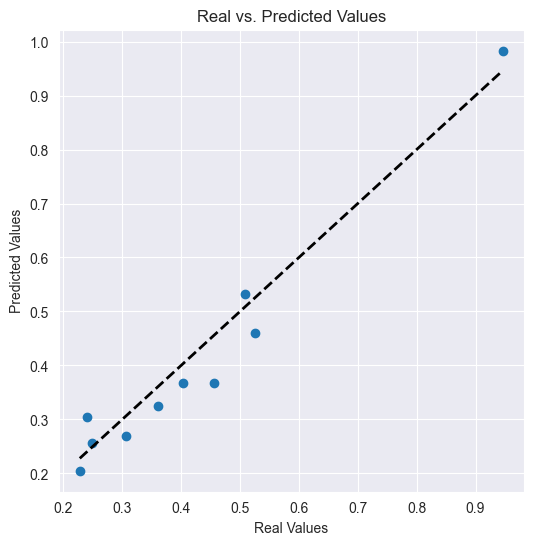

MSE: 0.002276379409375473
MAE: 0.04186912671556562
RMSE: 0.047711418018913175


In [168]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df_scaled is already defined
features_X = df_scaled.drop(['k_m2'], axis=1)
targets_X = df_scaled[['k_m2']]

# Initialize the best R^2 and corresponding random_state
best_r2 = float('-inf')
best_random_state = None
best_index = None

# Variables to store the best split data
best_X_train = None
best_X_test = None
best_y_train = None
best_y_test = None
best_y_pred = None

# Iterate over random_state from 1 to 100
for random_state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(features_X, targets_X, test_size=0.2, random_state=random_state)
    
    regressor = XGBRegressor(random_state=random_state)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Random State {random_state}: R^2 = {r2}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_random_state = random_state
        best_index = regressor
        best_X_train = X_train
        best_X_test = X_test
        best_y_train = y_train
        best_y_test = y_test
        best_y_pred = y_pred

print(f"\nMiglior R^2 trovato: {best_r2} con Random State: {best_random_state}")

# Train the best model again using the best random_state and split data
final_regressor = XGBRegressor(random_state=best_random_state)
final_regressor.fit(best_X_train, best_y_train)
final_y_pred = final_regressor.predict(best_X_test)

# Compare predictions with saved best predictions
print(f"Final model R^2: {r2_score(best_y_test, final_y_pred)}")
print(f"Best model R^2: {best_r2}")

# Print errors and comparison
for i in range(len(best_y_test)):
    print(f"Valore reale: {best_y_test.iloc[i]} - Valore predetto: {final_y_pred[i]} \n"
          f"Errore di previsione {abs(best_y_test.iloc[i] - final_y_pred[i])} \n")

plt.figure(figsize=(6, 6))
plt.scatter(best_y_test, final_y_pred)
plt.plot([best_y_test.min(), best_y_test.max()], [best_y_test.min(), best_y_test.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()

# Additional metrics
mse_k = mean_squared_error(best_y_test, final_y_pred)
mae_k = mean_absolute_error(best_y_test, final_y_pred)
rmse_k = np.sqrt(mse_k)

print(f"MSE: {mse_k}")
print(f"MAE: {mae_k}")
print(f"RMSE: {rmse_k}")


In [ ]:
from sklearn.model_selection import LeaveOneOut

X_train, X_test, y_train, y_test = train_test_split(features_X, targets_X, test_size=0.2, random_state=50)


#GradientBoostingRegressor

# Converti labels_train e labels_test in un array monodimensionale
labels_train = y_train.ravel()
labels_test = y_test.ravel()

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import time

# Definisci il modello GradientBoostingRegressor
modello = GradientBoostingRegressor()

# Definisci la griglia degli iperparametri da testare
parametri_grid = {
    'n_estimators': [100],  # Numero di alberi nell'ensemble
    'max_depth': [2],           # Profondità massima degli alberi
    'learning_rate': [0.01],  # Tasso di apprendimento (learning rate)
    'subsample': [ 0.9],      # Percentuale di campioni da utilizzare per ogni albero
    'colsample_bytree': [0.8],  # Percentuale di colonne da utilizzare per ogni albero
    'gamma': [0.1],            # Riduzione minima della perdita richiesta per dividere un nodo
    'reg_alpha': [0.1],        # Termine di regolarizzazione L1 sugli pesi delle foglie
    'reg_lambda': [0.1]        # Termine di regolarizzazione L2 sugli pesi delle foglie
}

loo = LeaveOneOut()

# Crea un oggetto GridSearchCV
ricerca_parametri = GridSearchCV(modello, parametri_grid, cv=loo, scoring='neg_mean_squared_error')

# Misura il tempo di inizio dell'allenamento
start_time = time.time()

# Esegui la ricerca degli iperparametri
ricerca_parametri.fit(X_train, labels_train)

# Calcola il tempo di fine dell'allenamento
end_time = time.time()

# Ottieni il miglior modello
modello_migliore = ricerca_parametri.best_estimator_

# Fai predizioni sul set di test
predizioni = modello_migliore.predict(X_test)

# Calcola le metriche
mse = mean_squared_error(labels_test, predizioni)
rmse = mean_squared_error(labels_test, predizioni, squared=False)
r_quadro = r2_score(labels_test, predizioni)

# Calcola il tempo totale di addestramento
training_time = end_time - start_time

print("Migliori iperparametri:", ricerca_parametri.best_params_)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r_quadro)
print("Training Time (seconds):", training_time)

In [ ]:
from xgboost import plot_importance

plot_importance(best_model, max_num_features=6)
plt.show()

In [ ]:
y_test_originale = []
for i in range(len(y_test)):
    y_test_originale.append(
        y_test.iloc[i] * (k2_max - k2_min) + k2_min
    )

y_pred_originale = []
for i in range(len(y_pred)):
    y_pred_originale.append(
        y_pred[i] * (k2_max - k2_min) + k2_min
    )

y_pred_originale = np.array(y_pred_originale)
y_test_originale = np.array(y_test_originale)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
plt.figure(figsize=(6, 6))
plt.xlim(0.15*10**-12, 0.8*10**-12)
plt.ylim(0.15*10**-12, 0.8*10**-12)
plt.scatter(y_test_originale, y_pred_originale)
plt.plot([y_test_originale.min(), y_test_originale.max()], [y_test_originale.min(), y_test_originale.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()    

In [175]:
#### test iperparametri più veloce...meno valori da provare....codice funzionante e veloce!!!

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import time

# Definisci gli iperparametri da cercare
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [2, 3, 4, 8],
    'max_features': [0.1, 0.5, 2, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'criterion': ['friedman_mse','absolute_error']

}

regressor = RandomForestRegressor(random_state=49)
loocv = LeaveOneOut()

# Crea un oggetto GridSearchCV per la ricerca degli iperparametri con cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose = 1)
# Lista per tenere traccia del tempo di esecuzione di ciascun set di iperparametri
execution_times = []
# Definisci il tempo massimo di esecuzione in secondi (300 secondi = 5 minuti)
max_execution_time = 300
start_time = time.time()
# Esegui la ricerca degli iperparametri
grid_search.fit(X_train, y_train.values.ravel())

end_time = time.time()
training_time = end_time - start_time
# Trova il miglior modello
best_model = grid_search.best_estimator_
# Valuta il modello sul set di test
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_bestModel = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", -grid_search.best_score_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2_bestModel)
print("Training Time (seconds):", training_time)


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best MSE Score: 0.010658359793397604
Mean Squared Error: 0.004328979313749175
Root Mean Squared Error: 0.06579497939622123
R^2 Score: -0.16083071284618322
Training Time (seconds): 1143.8544013500214


 R2:  -0.16083071284618322


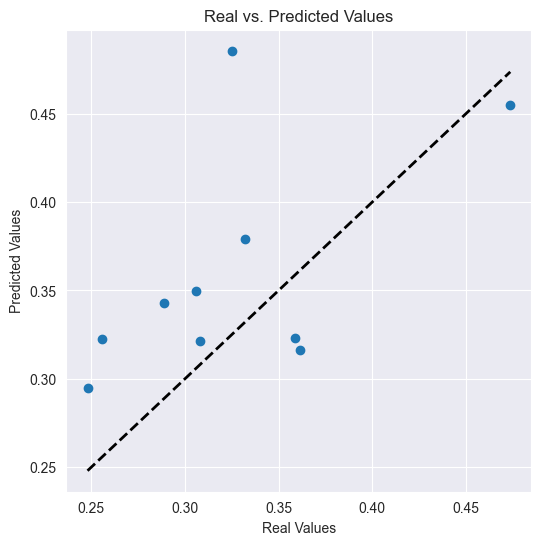

In [180]:
print(" R2: ",r2_score(y_test, y_pred))
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()    

In [ ]:
# salvare il modello allenato di XGBoost
import pickle

# Salva il modello su disco
with open('RandomForestRegressor_Permeability.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Modello salvato come 'RandomForestRegressor_Permeability.pkl'")
##################################################################

# Carica il modello salvato
import pickle
with open('RandomForestRegressor_Permeability.pkl', 'rb') as model_file:
    loaded_model_RFR_Perm = pickle.load(model_file)